In [1]:
import tensorflow as tf
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
import cv2 as cv

from IPython import display

In [2]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt
from tqdm import tqdm

DATADIR = "C:/Users/axel/Desktop/database1"
CATEGORIA = ["pixel"]

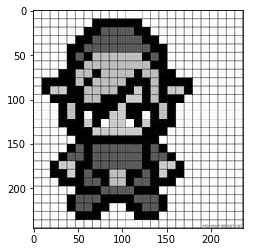

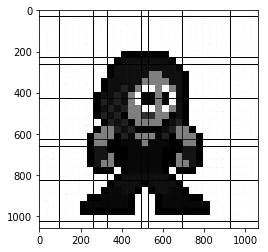

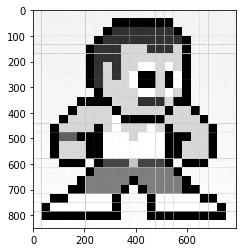

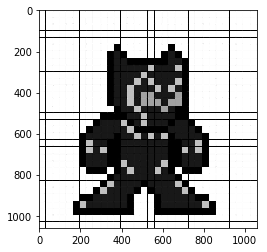

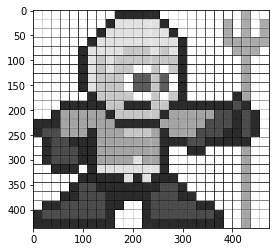

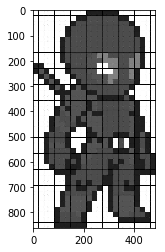

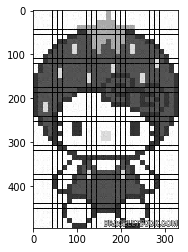

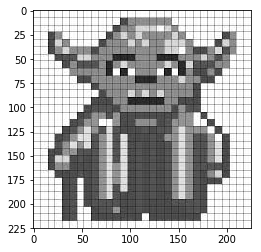

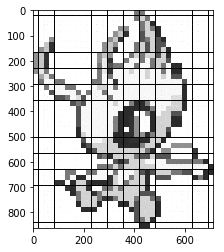

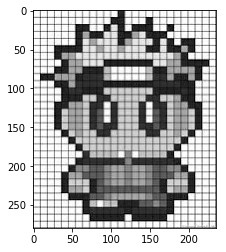

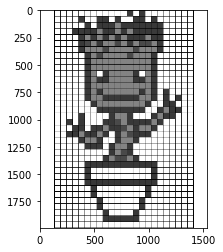

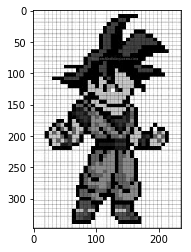

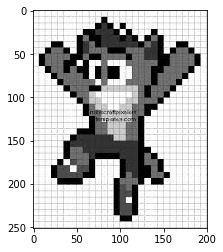

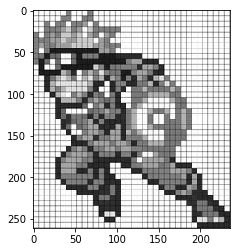

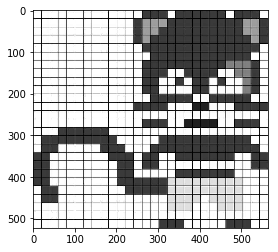

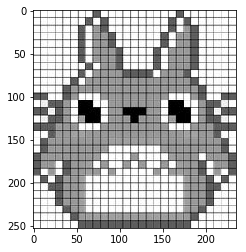

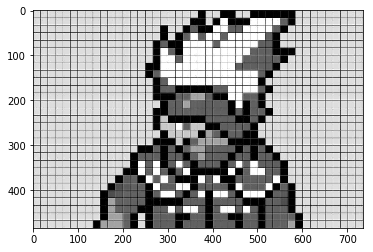

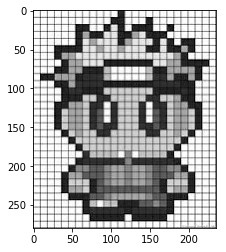

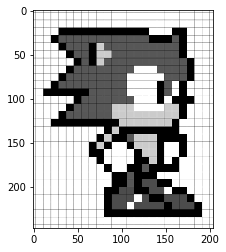

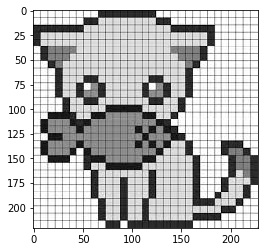

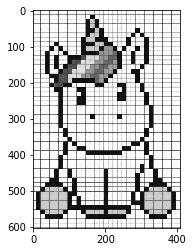

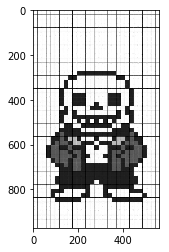

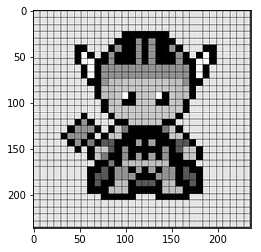

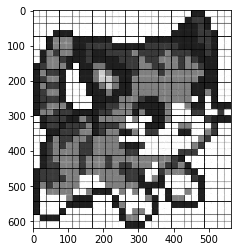

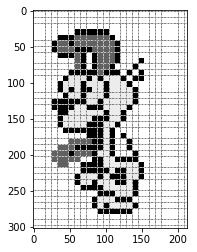

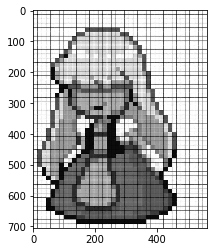

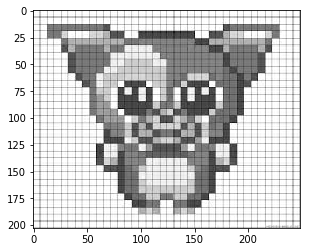

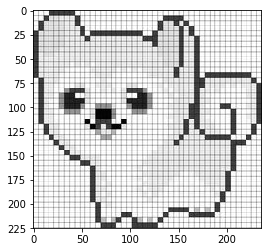

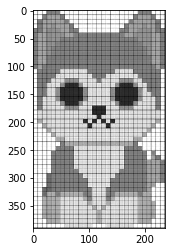

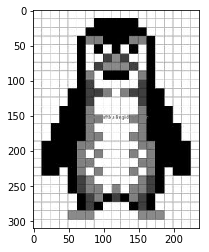

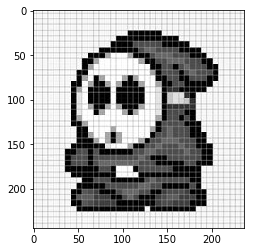

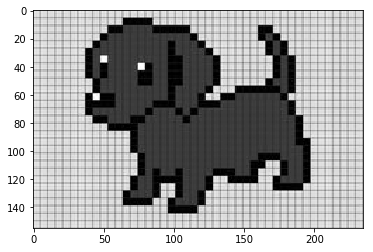

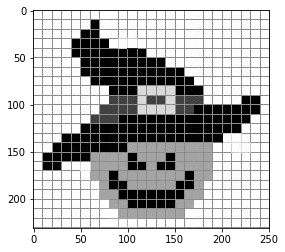

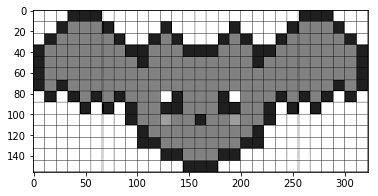

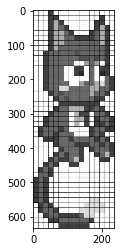

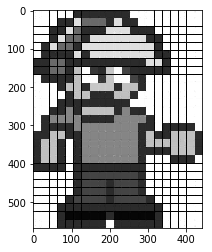

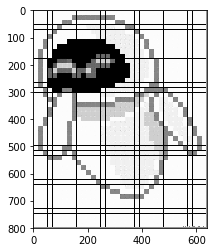

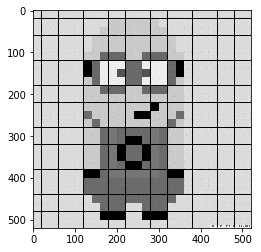

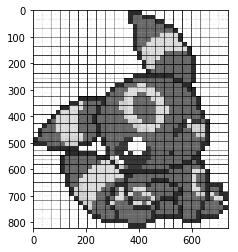

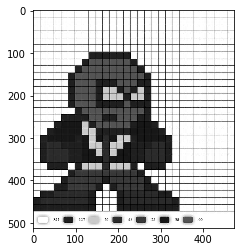

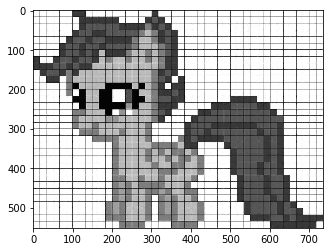

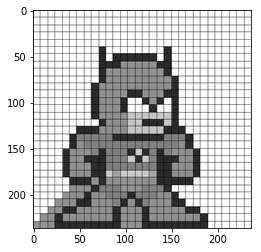

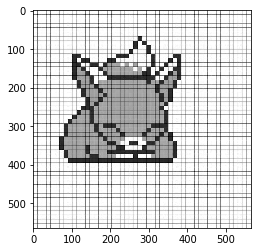

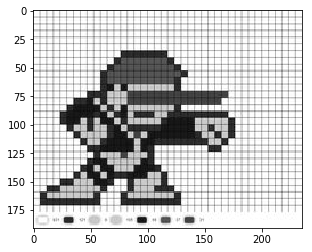

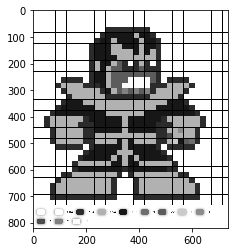

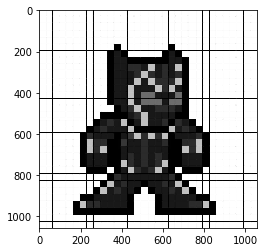

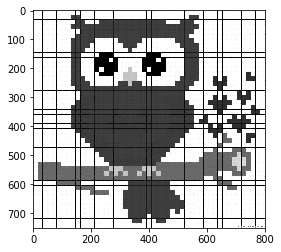

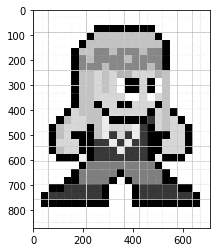

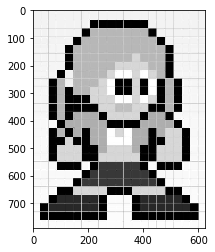

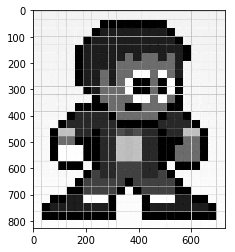

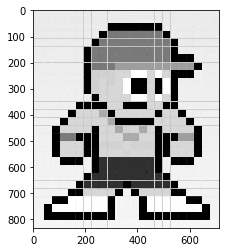

In [3]:
for category in  CATEGORIA:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv.imread(os.path.join(path,img),cv.IMREAD_GRAYSCALE)
        plt.imshow(img_array,cmap ="gray")
        plt.show()

In [4]:
print(img_array)

[[234 234 234 ... 234 234 234]
 [234 234 234 ... 234 234 234]
 [234 234 234 ... 234 234 234]
 ...
 [245 245 245 ... 245 245 245]
 [245 245 245 ... 245 245 245]
 [210 210 210 ... 210 210 210]]


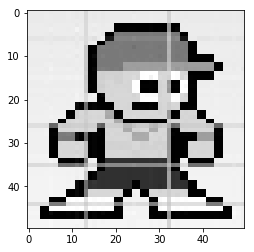

In [5]:
IMG_SIZE = 50

new_array = cv.resize(img_array,(IMG_SIZE,IMG_SIZE))

plt.imshow(new_array,cmap='gray')
plt.show()

In [6]:
training_data = []
def create_training_data():
    for catgory in CATEGORIA:
        path =os.path.join(DATADIR,category)
        class_num = CATEGORIA.index(category)
        
        for img in tqdm(os.listdir(path)):
            try:
                img_array=cv.imread(os.path.join(path,img),cv.IMREAD_grayscale)
                new_array= cv.resize(img_arrary,(IMG_SIZE,IMG_SIZE))
                trainig_data.append([new_array,class_num])
            except Exception as e:  # in the interest in keeping the output clean...
                pass    
create_training_data()

print(len(training_data))

100%|███████████████████████████████████████████████████████████████████████████████| 51/51 [00:00<00:00, 51150.05it/s]


0


In [7]:
import random

random.shuffle(training_data)

In [8]:
for sample in training_data[:10]:
    print(sample[1])

In [15]:
IMG_SIZE = 50
X = []
Y = []

for features,label in training_data:
    X.append(features)
    Y.append(label)

#print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


In [19]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y.pickle","wb")
pickle.dump(Y, pickle_out)
pickle_out.close()
#We can always load it in to our current script, or a totally new one by doing:

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("Y.pickle","rb")
y = pickle.load(pickle_in)